# Color Space

본 파일에서는 Bloch Sphere에 Color Space를 정의하는 방법을 소개합니다.

## Import Packages

In [37]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import transpile, assemble, Aer
from qiskit.visualization import plot_histogram

## Color Space Definiton

기존 color space는 Cartesian Coordinates에서 x,y,z 값에 각각 R,G,B 값을 할당하는 형태로 정육면체를 이루고 있었다.

그러나 Quantum Image Processing 에서는 Bloch Sphere의 표면 위에 R,G,B 값을 할당해야 하므로 규격화를 한 다음 매핑한다.

In [24]:
class RGBMapping3D_cart:
    def __init__(self, color_index, color_list):
        self.color_index = np.array(color_index)
        self.color_list = np.array(color_list)

    def plot_points(self):
        fig = plt.figure(figsize=(14,10))
        ax = fig.add_subplot(111, projection='3d')

        # RGB 값에 해당하는 좌표를 점으로 플로팅
        points = np.array([point[0] for point in self.color_list])
        colors = self.color_index / 255

        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, marker='o')
        ax.view_init(30,60)
        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')

        plt.show()

In [26]:
classic_color_list = []
classic_color_index = []
for i in tqdm(range(0,256)):
    for j in range(0,256):
        for k in range(0,256):
            classic_color_index.append([i,j,k])
            P = np.array([i,j,k])
            classic_color_list.append([P])

  0%|          | 0/256 [00:00<?, ?it/s]

100%|██████████| 256/256 [05:56<00:00,  1.39s/it]  



Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



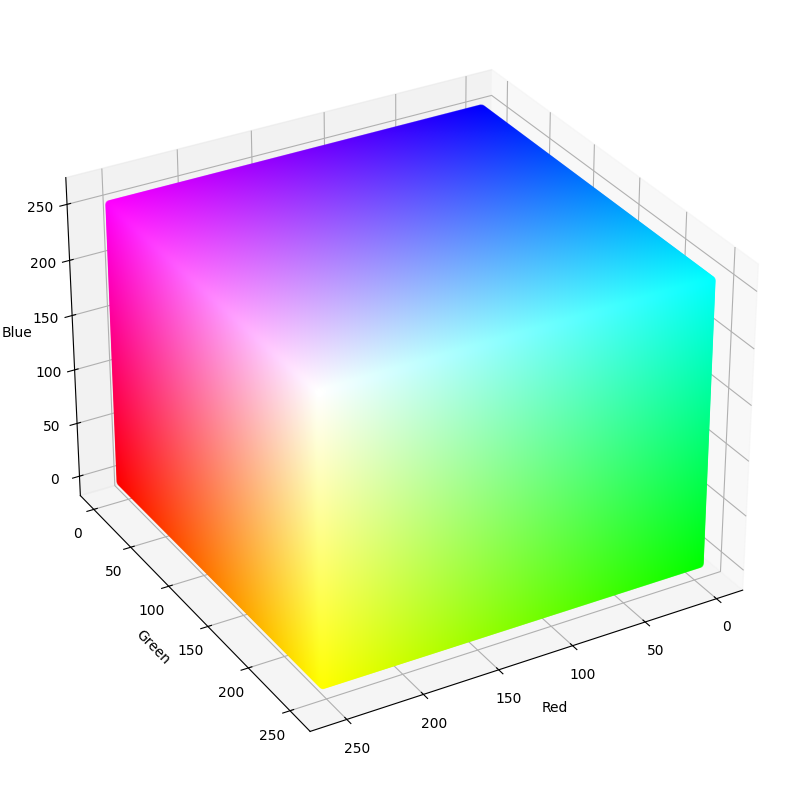

In [27]:
rgb_mapping_3d_classic = RGBMapping3D_cart(classic_color_index[:], classic_color_list[:])

# 좌표를 플로팅
rgb_mapping_3d_classic.plot_points()

# A novel RGB color space

### RGB 값을 Bloch Sphere에 매핑하는 식 구현하고, 전처리를 통해 중복값을 제거한 다음, Quantum Circuit으로 컬러 스페이스 표현

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

color_list = []
color_index = []
color_angle = []

def generate_points():
    for n in tqdm(range(0,256)):
        for k in range(0,n+1):
            if n == 0 and k == 0:
                color_index.append([n, k, 0])
                angle = [0, 0]
                P = np.array([0,0,1])
                color_list.append([P])
                color_angle.append([angle])
            else:
                theta = n * np.pi / (255 * 2)
                phi = k * np.pi / (n * 3)
                x = np.sin(theta) * np.cos(phi)
                y = np.sin(theta) * np.sin(phi)
                z = np.cos(theta)
                color_index.append([n, k, 0])
                angle = [theta, phi]
                P = np.array([x,y,z])
                color_list.append([P])
                color_angle.append([angle])

    for n in tqdm(range(0,256)):
        for k in range(0,n+1):
            if n == 0 and k == 0:
                color_index.append([n, k, 0])
                angle = [0, 0]
                P = np.array([0,0,1])
                color_list.append([P])
                color_angle.append([angle])
            else:
                theta = n * np.pi / (255 * 2)
                phi = k * np.pi / (n * 3) + np.pi/3
                x = np.sin(theta) * np.cos(phi)
                y = np.sin(theta) * np.sin(phi)
                z = np.cos(theta)
                color_index.append([n-k, n, 0])
                angle = [theta, phi]
                P = np.array([x,y,z])
                color_list.append([P])
                color_angle.append([angle])

    for n in tqdm(range(0,256)):
        for k in range(0,n+1):
            if n == 0 and k == 0:
                color_index.append([n, k, 0])
                angle = [0, 0]
                P = np.array([0,0,1])
                color_list.append([P])
                color_angle.append([angle])
            else:
                theta = n * np.pi / (255 * 2)
                phi = k * np.pi / (n * 3) + 2 * np.pi/3
                x = np.sin(theta) * np.cos(phi)
                y = np.sin(theta) * np.sin(phi)
                z = np.cos(theta)
                color_index.append([0, n, k])
                angle = [theta, phi]
                P = np.array([x,y,z])
                color_list.append([P])
                color_angle.append([angle])

    for n in tqdm(range(0,256)):
        for k in range(0,n+1):
            if n == 0 and k == 0:
                color_index.append([n, k, 0])
                angle = [0, 0]
                P = np.array([0,0,1])
                color_list.append([P])
                color_angle.append([angle])
            else:
                theta = n * np.pi / (255 * 2)
                phi = k * np.pi / (n * 3) + 3 * np.pi/3
                x = np.sin(theta) * np.cos(phi)
                y = np.sin(theta) * np.sin(phi)
                z = np.cos(theta)
                color_index.append([0, n-k, n])
                angle = [theta, phi]
                P = np.array([x,y,z])
                color_list.append([P])
                color_angle.append([angle])

    for n in tqdm(range(0,256)):
        for k in range(0,n+1):
            if n == 0 and k == 0:
                color_index.append([n, k, 0])
                angle = [0, 0]
                P = np.array([0,0,1])
                color_list.append([P])
                color_angle.append([angle])
            else:
                theta = n * np.pi / (255 * 2)
                phi = k * np.pi / (n * 3) + 4 * np.pi/3
                x = np.sin(theta) * np.cos(phi)
                y = np.sin(theta) * np.sin(phi)
                z = np.cos(theta)
                color_index.append([k, 0, n])
                angle = [theta, phi]
                P = np.array([x,y,z])
                color_list.append([P])
                color_angle.append([angle])

    for n in tqdm(range(0,256)):
        for k in range(0,n+1):
            if n == 0 and k == 0:
                color_index.append([n, k, 0])
                angle = [0, 0]
                P = np.array([0,0,1])
                color_list.append([P])
                color_angle.append([angle])
            else:
                theta = n * np.pi / (255 * 2)
                phi = k * np.pi / (n * 3) + 5 * np.pi/3
                x = np.sin(theta) * np.cos(phi)
                y = np.sin(theta) * np.sin(phi)
                z = np.cos(theta)
                color_index.append([n, 0, n-k])
                angle = [theta, phi]
                P = np.array([x,y,z])
                color_list.append([P])
                color_angle.append([angle])
    for i in tqdm(range(1, 256)):
        for m in range(i, 256):
            for k in range(i, m+1):
                if i == m:
                    theta = i * np.pi / 510
                    phi = i * np.pi / 510
                    x = np.cos(theta)
                    y = 0
                    z = -np.sin(phi)
                    color_index.append([i, i, i])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])
                else:
                    theta = (i-1) * np.pi/ 510 +  np.pi  * (m-i+1) / ((255 * 2) * (255-i+1))
                    phi =(k  - i) * np.pi / (3 * (m - i ))
                    x = np.cos(theta) * np.cos(phi)
                    y = np.cos(theta) * np.sin(phi)
                    z = -np.sin(theta)
                    color_index.append([m, k, i])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])

    for i in tqdm(range(1, 256)):
        for m in range(i, 256):
            for k in range(1, m-i+1):
                if i == m:
                    theta = i * np.pi / 510
                    phi = i * np.pi / 510
                    x = np.cos(theta)
                    y = 0
                    z = -np.sin(phi)
                    color_index.append([i, i, i])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])
                else:
                    theta = (i-1) * np.pi/ 510 +  np.pi  * (m-i+1) / ((255 * 2) * (255-i+1))
                    phi = k* np.pi / (3 * (m - i )) +  np.pi/3
                    x = np.cos(theta) * np.cos(phi)
                    y = np.cos(theta) * np.sin(phi)
                    z = -np.sin(theta)
                    color_index.append([m-k, m, i])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])

    for i in tqdm(range(1, 256)):
        for m in range(i, 256):
            for k in range(i, m+1):
                if i == m:
                    theta = i * np.pi / 510
                    phi = i * np.pi / 510
                    x = np.cos(theta)
                    y = 0
                    z = -np.sin(phi)
                    color_index.append([i, m, k])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])
                else:
                    theta = (i-1) * np.pi/ 510 +  np.pi  * (m-i+1) / ((255 * 2) * (255-i+1))
                    phi =(k  - i) * np.pi / (3 * (m - i )) + 2 * np.pi/3
                    x = np.cos(theta) * np.cos(phi)
                    y = np.cos(theta) * np.sin(phi)
                    z = -np.sin(theta)
                    color_index.append([i, m, k])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])

    for i in tqdm(range(1, 256)):
        for m in range(i, 256):
            for k in range(1, m-i+1):
                if i == m:
                    theta = i * np.pi / 510
                    phi = i * np.pi / 510
                    x = np.cos(theta)
                    y = 0
                    z = np.sin(phi)
                    color_index.append([i, i, i])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])
                else:
                    theta = (i-1) * np.pi/ 510 +  np.pi  * (m-i+1) / ((255 * 2) * (255-i+1))
                    phi = k  * np.pi / (3 * (m - i )) + 3 * np.pi/3
                    x = np.cos(theta) * np.cos(phi)
                    y = np.cos(theta) * np.sin(phi)
                    z = -np.sin(theta)
                    color_index.append([i, m-k, m])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])

    for i in tqdm(range(1, 256)):
        for m in range(i, 256):
            for k in range(i, m+1):
                if i == m:
                    theta = i * np.pi / 510
                    phi = i * np.pi / 510
                    x = np.cos(theta)
                    y = 0
                    z = -np.sin(phi)
                    color_index.append([k, i, m])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])
                else:
                    theta = (i-1) * np.pi/ 510 +  np.pi  * (m-i+1) / ((255 * 2) * (255-i+1))
                    phi =(k  - i) * np.pi / (3 * (m - i )) +  4 * np.pi/3
                    x = np.cos(theta) * np.cos(phi)
                    y = np.cos(theta) * np.sin(phi)
                    z = -np.sin(theta)
                    color_index.append([k, i, m])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])

    for i in tqdm(range(1, 256)):
        for m in range(i, 256):
            for k in range(1, m-i+1):
                if i == m:
                    theta = i * np.pi / 510
                    phi = i * np.pi / 510
                    x = np.cos(theta)
                    y = 0
                    z = -np.sin(phi)
                    color_index.append([i, i, i])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])
                else:
                    theta = (i-1) * np.pi/ 510 +  np.pi  * (m-i+1) / ((255 * 2) * (255-i+1))
                    phi = k  * np.pi / (3 * (m - i )) + 5 * np.pi/3
                    x = np.cos(theta) * np.cos(phi)
                    y = np.cos(theta) * np.sin(phi)
                    z = -np.sin(theta)
                    color_index.append([m, i, m-k])
                    angle = [theta, phi]
                    P = np.array([x, y, z])
                    color_list.append([P])
                    color_angle.append([angle])

generate_points()

# Convert to numpy arrays for unique operation
color_index_np = np.array(color_index)
color_list_np = np.array([point[0] for point in color_list])
color_angle_np = np.array([point[0] for point in color_angle])

# Find unique rows
_, unique_indices = np.unique(color_index_np, axis=0, return_index=True)
color_index_unique = color_index_np[unique_indices]
color_list_unique = color_list_np[unique_indices]
color_angle_unique = color_angle_np[unique_indices]


100%|██████████| 255/255 [00:19<00:00, 13.37it/s]


In [16]:
print(color_index_unique.shape)
print(color_list_unique.shape)

(16777216, 3)
(16777216, 3)


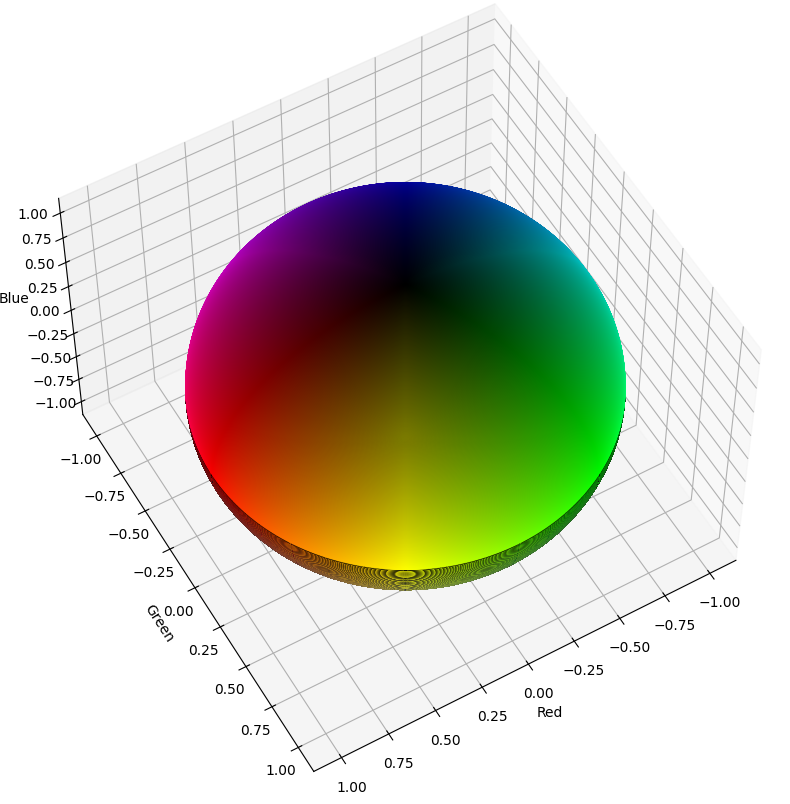

In [31]:
class RGBMapping3D:
    def __init__(self, color_index, color_list):
        self.color_index = np.array(color_index)
        self.color_list = np.array(color_list)

    def plot_points(self):
        fig = plt.figure(figsize=(14,10))
        ax = fig.add_subplot(111, projection='3d')

        # RGB values to coordinates
        points = self.color_list
        colors = self.color_index / 255

        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, marker='o')
        ax.view_init(55, 60)
        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')

        plt.show()

rgb_mapping_3d = RGBMapping3D(color_index_unique, color_list_unique)

# Plot coordinates
rgb_mapping_3d.plot_points()

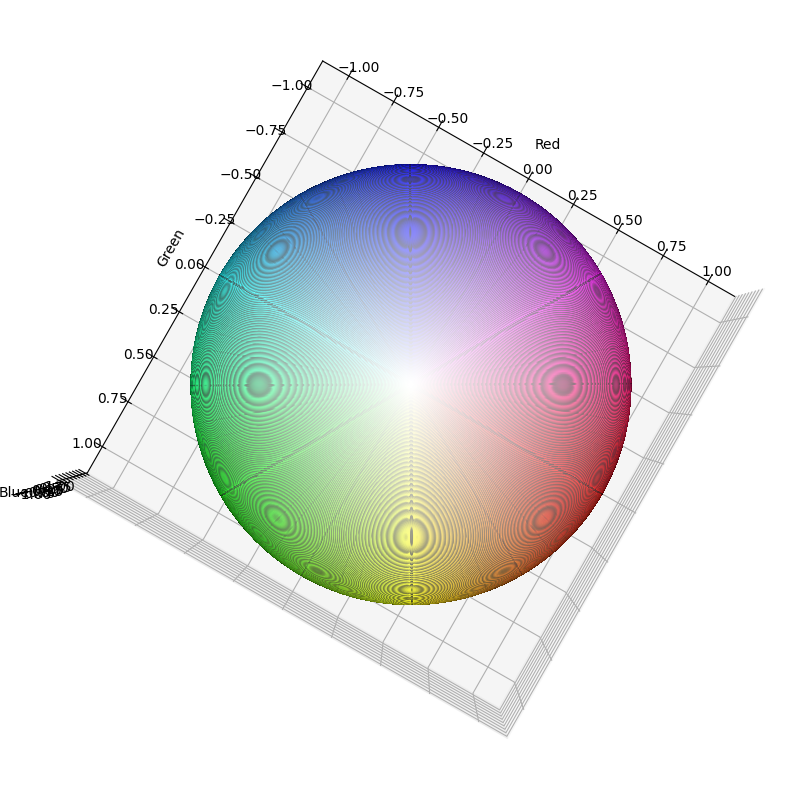

Thus, 16777216


In [33]:
class RGBMapping3DS:
    def __init__(self, color_index, color_list):
        self.color_index = np.array(color_index)
        self.color_list = np.array(color_list)

    def plot_points(self):
        fig = plt.figure(figsize=(14,10))
        ax = fig.add_subplot(111, projection='3d')

        # RGB values to coordinates
        points = self.color_list
        colors = self.color_index / 255

        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, marker='o')
        ax.view_init(270, 60)
        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')

        plt.show()

rgb_mapping_3d_south = RGBMapping3DS(color_index_unique, color_list_unique)

# Plot coordinates
rgb_mapping_3d_south.plot_points()
print("Thus,", len(color_index_unique))

In [47]:
class RGBMapping3D_side:
    def __init__(self, color_index, color_list):
        self.color_index = np.array(color_index)
        self.color_list = np.array(color_list)

    def plot_points(self):
        fig = plt.figure(figsize=(14,10))
        ax = fig.add_subplot(111, projection='3d')

        # RGB 값에 해당하는 좌표를 점으로 플로팅
        points = self.color_list
        colors = self.color_index / 255

        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, marker='o')
        ax.view_init(0,270)
        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')

        plt.show()

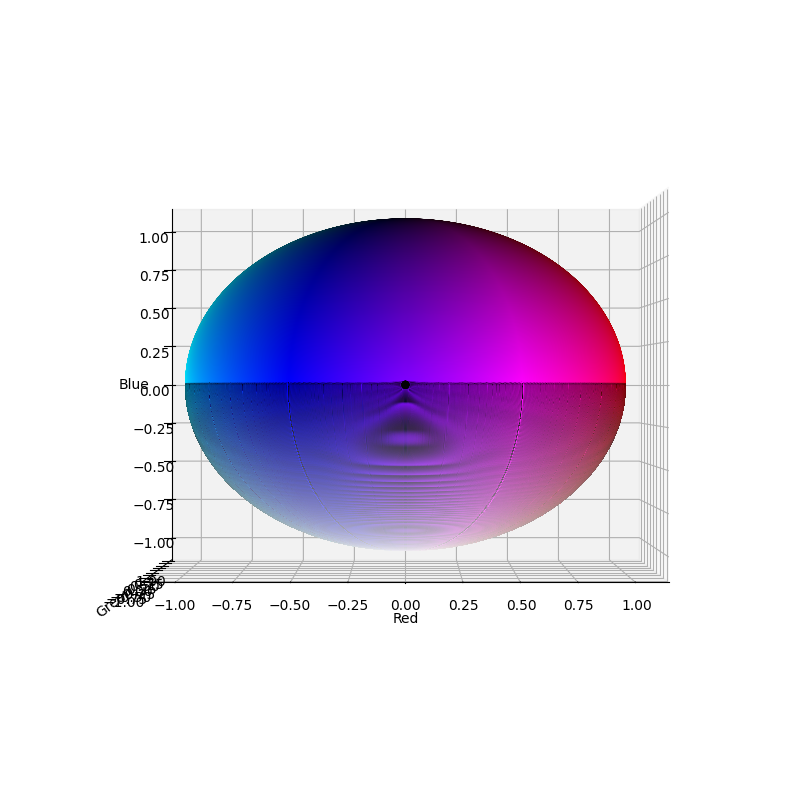

In [48]:
rgb_mapping_3d_side = RGBMapping3D_side(color_index_unique, color_list_unique)

# Plot coordinates
rgb_mapping_3d_side.plot_points()

위 그림과 같이 Bloch Sphere로 표현된 RGB 값의 좌표를 회로에 설계하여 측정한 다음,
State의 coefficient를 사용하여 계산하면 원래 RGB 값을 추론할 수 있다

또한 Look-Up-Table을 통해 해당 x,y,z 값을 갖는 RGB 값을 찾아보면 처음에 매핑한 RGB 값을 찾을 수 있다.

#### Example

#### RGB = [200,100,0]

C:\Users\HCI\AppData\Local\Temp\ipykernel_244\1224835838.py:30: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = aer_sim.run(qobj)


0.38083 s
[array([201.84966197, 102.57715635,   0.        ])]


C:\Users\HCI\AppData\Local\Temp\ipykernel_244\1224835838.py:102: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(1,1,c=colors, marker='o')


Text(0, 0.5, 'Green')

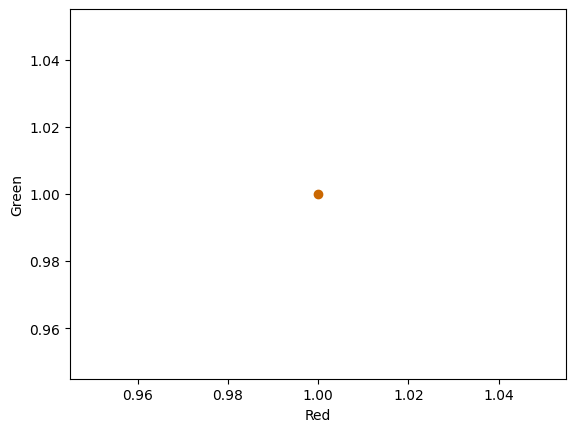

In [43]:
n = 200
k = 100

start = time.time()
x = np.sin(n*np.pi/510) * np.cos(k * np.pi / (3 *n))
y = np.sin(n*np.pi/510) * np.sin(k * np.pi / (3 *n))
z = np.cos(n*np.pi/510)
phi = round(np.arctan2(y,x),4) / 2
theta = round(np.arccos(z),4) / 2
Q = np.array([x,y,z])

c_reg = QuantumRegister(1,name='c_reg')
color = QuantumRegister(1, name='color = [200,100,0]')
classic = ClassicalRegister(2, name = 'classical')
qc = QuantumCircuit(c_reg,color, classic)
qc.h(1)
qc.barrier()
qc.cry(theta,color,c_reg)
qc.barrier()
qc.x(1)
qc.barrier()
qc.cry(phi,color,c_reg)
qc.barrier()
qc.x(1)
qc.measure([0,1],[0,1])

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=200000)
job = aer_sim.run(qobj)
result = job.result()
counts = result.get_counts()

pixel_color_theta_recon = []
pixel_color_phi_recon = []

pixel_color_theta = []
pixel_color_phi = []

for i in range(0, 1):
    for item in counts.items():
        key = item[0]
        amount = item[1]
        state = key[-1]
        decision = int(key[0])
        bin_coord = key[1:-1]

        if decision == 1:
            pixel_color_theta.append((state, amount))
        elif decision == 0:
            pixel_color_phi.append((state, amount))

# ======================== phi ====================================
total_phi_value = 0
for state in pixel_color_phi:
    state_value = state[1]
    total_phi_value += state_value

phi_state_0 = []
for phi, amount in pixel_color_phi:
    if not int(theta):
        phi_state_0.append((phi, amount))

for i in range(1):
    try:
        theta = np.arccos((phi_state_0[i][1]/total_phi_value)**(1/2))
        pixel_color_phi_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")
# ======================== theta ====================================

total_theta_value = 0
for state in pixel_color_theta:
    state_value = state[1]
    total_theta_value += state_value

theta_state_0 = []
for theta, amount in pixel_color_theta:
    if not int(theta):
        theta_state_0.append((theta, amount))

for i in range(1):
    try:
        theta = np.arccos((theta_state_0[i][1]/total_theta_value)**(1/2))
        pixel_color_theta_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")

recon_color = []
for i in range(len(pixel_color_phi_recon)):
    n_recon = pixel_color_theta_recon[i] * 1020 / np.pi
    k_recon = pixel_color_phi_recon[i] * 6 * n_recon / np.pi
    recon_color.append(np.array([n_recon,k_recon,0]))
end = time.time()
time_simul = end - start
print(f'{time_simul:.5f}', "s")
print(recon_color)
recon_color_index = recon_color[0]
fig = plt.figure()
ax = fig.add_subplot(111)
colors = recon_color_index / 255
ax.scatter(1,1,c=colors, marker='o')
ax.set_xlabel('Red')
ax.set_ylabel('Green')

In [45]:
error = []
for i in range(1):
    del_x = recon_color[0][0] - n
    del_y = recon_color[0][1] - k
    err = np.sqrt(del_x**2+del_y**2)
    error.append(err)

print("error = ",error,"time = ", time_simul)

error =  [3.1722207109397123] time =  0.380831241607666


In [46]:
from qiskit_ionq import IonQProvider
provider = IonQProvider("api")

In [63]:
n = 200
k = 100

start_ionq = time.time()
x = np.sin(n*np.pi/510) * np.cos(k * np.pi / (3 *n))
y = np.sin(n*np.pi/510) * np.sin(k * np.pi / (3 *n))
z = np.cos(n*np.pi/510)
phi = round(np.arctan2(y,x),4) / 2
theta = round(np.arccos(z),4) / 2
Q = np.array([x,y,z])

c_reg = QuantumRegister(1,name='c_reg')
color = QuantumRegister(1, name='color = [200,100,0]')
classic = ClassicalRegister(2, name = 'classical')
qc = QuantumCircuit(c_reg,color, classic)
qc.h(1)
qc.barrier()
qc.cry(theta,color,c_reg)
qc.barrier()
qc.x(1)
qc.barrier()
qc.cry(phi,color,c_reg)
qc.barrier()
qc.x(1)
qc.measure([0,1],[0,1])

ionq_sim = provider.get_backend("ionq_qpu.harmony")
t_qc_image = transpile(qc, ionq_sim)
job_ionq = ionq_sim.run(t_qc_image, shots=10000)
result_ionq = job_ionq.result()
counts_ionq = result_ionq.get_counts()

pixel_color_theta_recon = []
pixel_color_phi_recon = []

pixel_color_theta = []
pixel_color_phi = []

for i in range(0, 1):
    for item in counts_ionq.items():
        key = item[0]
        amount = item[1]
        state = key[-1]
        decision = int(key[0])
        bin_coord = key[1:-1]

        if decision == 1:
            pixel_color_theta.append((state, amount))
        elif decision == 0:
            pixel_color_phi.append((state, amount))

# ======================== phi ====================================
total_phi_value = 0
for state in pixel_color_phi:
    state_value = state[1]
    total_phi_value += state_value

phi_state_0 = []
for phi, amount in pixel_color_phi:
    if not int(theta):
        phi_state_0.append((phi, amount))

for i in range(1):
    try:
        theta = np.arccos((phi_state_0[i][1]/total_phi_value)**(1/2))
        pixel_color_phi_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")
# ======================== theta ====================================

total_theta_value = 0
for state in pixel_color_theta:
    state_value = state[1]
    total_theta_value += state_value

theta_state_0 = []
for theta, amount in pixel_color_theta:
    if not int(theta):
        theta_state_0.append((theta, amount))

for i in range(1):
    try:
        theta = np.arccos((theta_state_0[i][1]/total_theta_value)**(1/2))
        pixel_color_theta_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")

recon_color_ionq = []
for i in range(len(pixel_color_phi_recon)):
    n_recon_ionq = pixel_color_theta_recon[i] * 1020 / np.pi
    k_recon_ionq = pixel_color_phi_recon[i] * 6 * n_recon_ionq / np.pi
    recon_color_ionq.append(np.array([n_recon_ionq,k_recon_ionq,0]))
end_ionq = time.time()
time_ionq = end_ionq -  start_ionq
print(f'{time_ionq:.5f}', "s")
print(recon_color_ionq)
recon_color__ionq_index = recon_color_ionq[0]
fig = plt.figure()
ax = fig.add_subplot(111)
colors_ionq = recon_color__ionq_index / 255
ax.scatter(1,1,c=colors_ionq, marker='o')
ax.set_xlabel('Red')
ax.set_ylabel('Green')

In [59]:
error_ionq = []
for i in range(1):
    del_x = recon_color_ionq[0][0] - n
    del_y = recon_color_ionq[0][1] - k
    err_ionq = np.sqrt(del_x**2+del_y**2)
    error_ionq.append(err_ionq)

print("error = ",error_ionq,"time = ", time_ionq)

error =  [24.677950587085036] time =  374.0126967430115


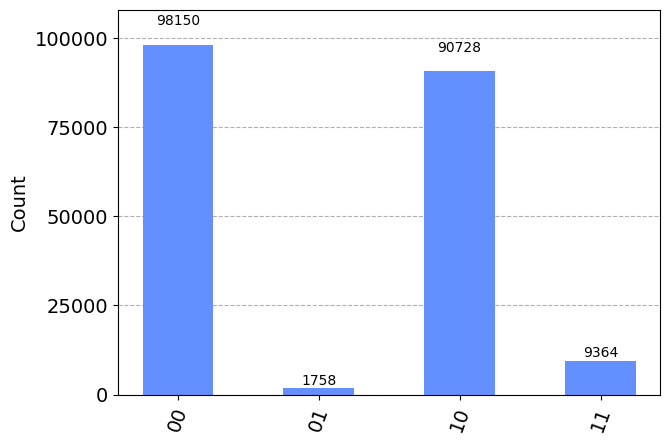

In [54]:
plot_histogram(counts)

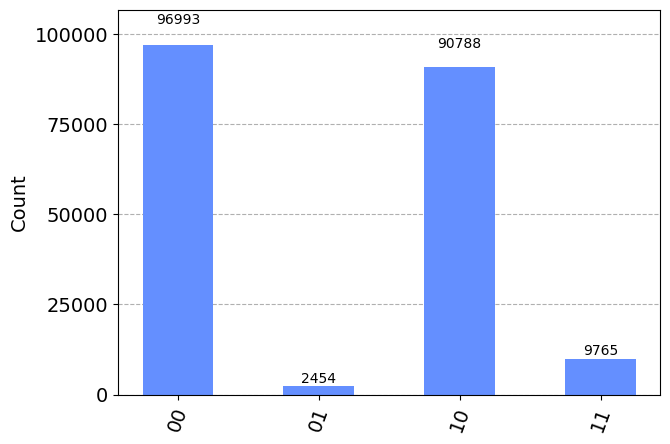

In [56]:
plot_histogram(counts_ionq)

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


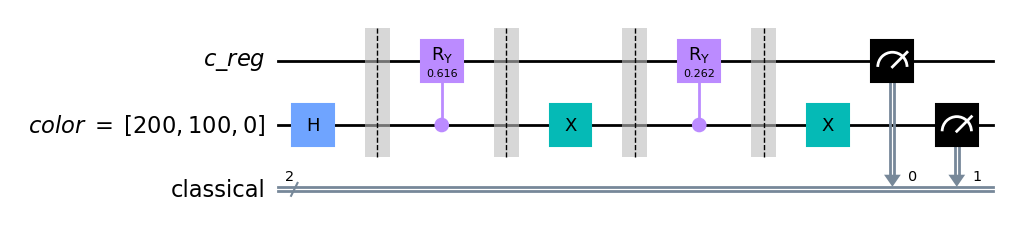

In [57]:
qc.draw('mpl')

In [20]:
color_angle_np = np.array([point[0] for point in color_angle])

# Find unique rows
_, unique_indices = np.unique(color_index_np, axis=0, return_index=True)
color_angle_unique = color_angle_np[unique_indices]

unique_color_list = color_list_unique.tolist()
unique_color_index = color_index_unique.tolist()
unique_color_angle = color_angle_unique.tolist()

In [5]:
for i in range(32):
    color_space = pd.Series(unique_color_list[524288*i:524288*(i+1)], index = pd.Index(unique_color_index[524288*i:524288*(i+1)]))
    color_space.to_excel(f"color_space{i+1}.xlsx", index=True)
for i in range(32):
    color_angle = pd.Series(unique_color_angle[524288*i:524288*(i+1)], index = pd.Index(unique_color_index[524288*i:524288*(i+1)]))
    color_angle.to_excel(f"color_space_angle{i+1}.xlsx", index=True)